# Explore NWS OKX Flash Flood Events

## Setup

In [8]:
# Import statements
import os

import matplotlib.pyplot as plt
import mplcyberpunk  # type: ignore
import pandas as pd

plt.style.use("cyberpunk")
plt.rcParams["text.usetex"] = True
%config InlineBackend.figure_format = "retina"
%matplotlib inline


In [5]:
# Read in CSV file containing flash flood events
df = pd.read_csv("data/storm_data_search_results.csv")

# Remove rows where EVENT_ID is not a digit
df = df[df["EVENT_ID"].astype(str).str.isdigit()]

# Turn BEGIN_TIME and END_TIME into strings with leading zeros if necessary
df["BEGIN_TIME"] = df["BEGIN_TIME"].fillna(0).astype(int).astype(str).str.zfill(4)
df["END_TIME"] = df["END_TIME"].fillna(0).astype(int).astype(str).str.zfill(4)

# Combine TIME and DATE into a single datetime string
begin_str = df["BEGIN_DATE"] + " " + df["BEGIN_TIME"]
end_str = df["END_DATE"] + " " + df["END_TIME"]

# Convert the datetime strings to pandas datetime objects
df["BEGIN_DATETIME"] = pd.to_datetime(
    begin_str, format="%m/%d/%Y %H%M", errors="coerce"
)
df["END_DATETIME"] = pd.to_datetime(end_str, format="%m/%d/%Y %H%M", errors="coerce")

# Double-check results
df[["BEGIN_DATE", "BEGIN_TIME", "BEGIN_DATETIME"]].head(10)

,BEGIN_DATE,BEGIN_TIME,BEGIN_DATETIME
0,07/03/1996,1520,1996-07-03 15:20:00
1,07/03/1996,1840,1996-07-03 18:40:00
2,07/08/1996,1829,1996-07-08 18:29:00
3,07/13/1996,0830,1996-07-13 08:30:00
4,07/31/1996,1010,1996-07-31 10:10:00
5,07/31/1996,1012,1996-07-31 10:12:00
6,07/31/1996,1012,1996-07-31 10:12:00
7,07/31/1996,1100,1996-07-31 11:00:00
8,07/31/1996,1100,1996-07-31 11:00:00
9,09/08/1996,1500,1996-09-08 15:00:00


## Number of yearly events

In [6]:
# Take only the first row for each EPISODE_ID
df_unique = df.drop_duplicates(subset=["EPISODE_ID"], keep="first").copy()

# Calculate number of events per year
df_unique["YEAR"] = df_unique["BEGIN_DATETIME"].dt.year
df_unique["EVENT_COUNT"] = 1
df_yearly = df_unique.groupby("YEAR")["EVENT_COUNT"].sum().reset_index()

### Plotting

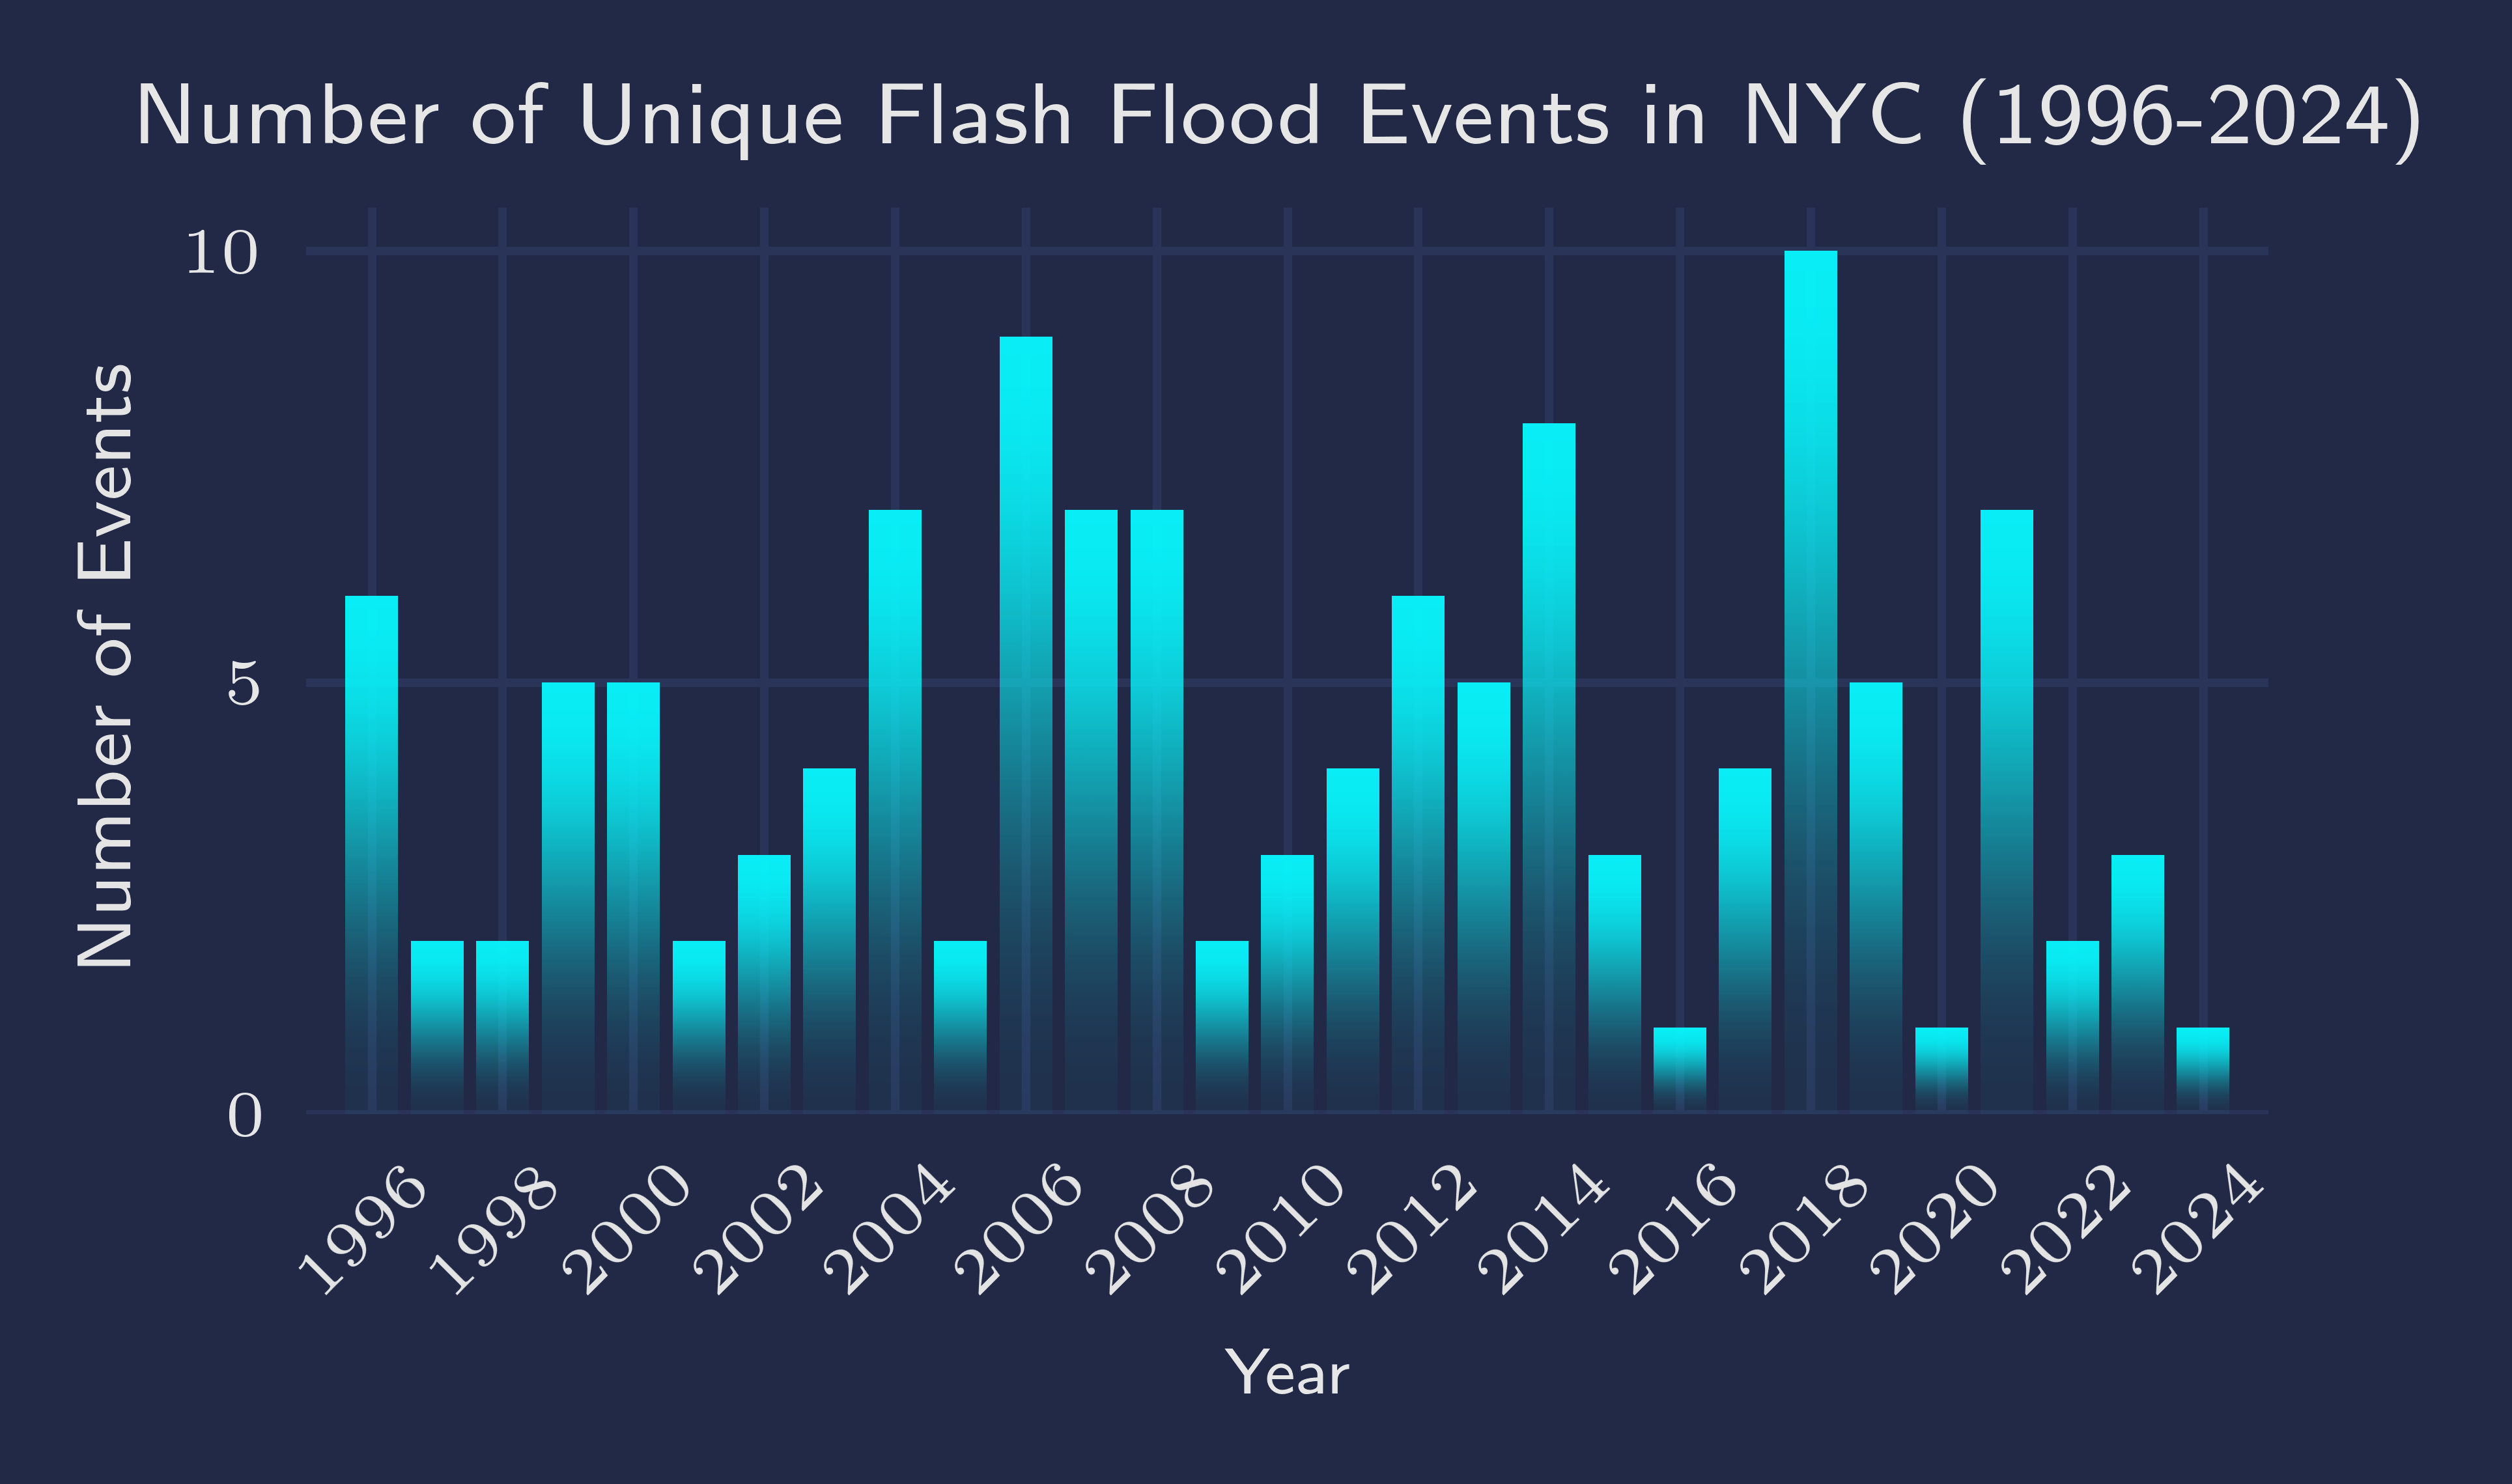

In [10]:
# Create output directory if it doesn't exist
os.makedirs("figs/ffe-stats", exist_ok=True)

# Make a bar graph of the number of events per year
plt.figure(figsize=(3.2,2),dpi=600)
bars = plt.bar(df_yearly["YEAR"], df_yearly["EVENT_COUNT"], width=0.8)
mplcyberpunk.add_bar_gradient(bars=bars)


# Set x-axis limit from 1996 to 2024
plt.xlim(1995, 2025)
plt.xlabel("Year",fontsize=6)
plt.ylabel("Number of Events",fontsize=7)
plt.title("Number of Unique Flash Flood Events in NYC (1996-2024)",fontsize=8)

# Add ticks for every other year
plt.xticks(df_yearly["YEAR"][::2], rotation=45, fontsize=6)
plt.yticks(fontsize=6)

plt.tight_layout()
plt.savefig("figs/ffe-stats/events_per_year.png", bbox_inches="tight")
plt.show()

## Diurnal Cycle

In [11]:
# Group by hour of day and count the number of events
df_unique["HOUR"] = df_unique["BEGIN_DATETIME"].dt.hour
df_hourly = df_unique.groupby("HOUR")["EVENT_COUNT"].sum().reset_index()

### Plotting

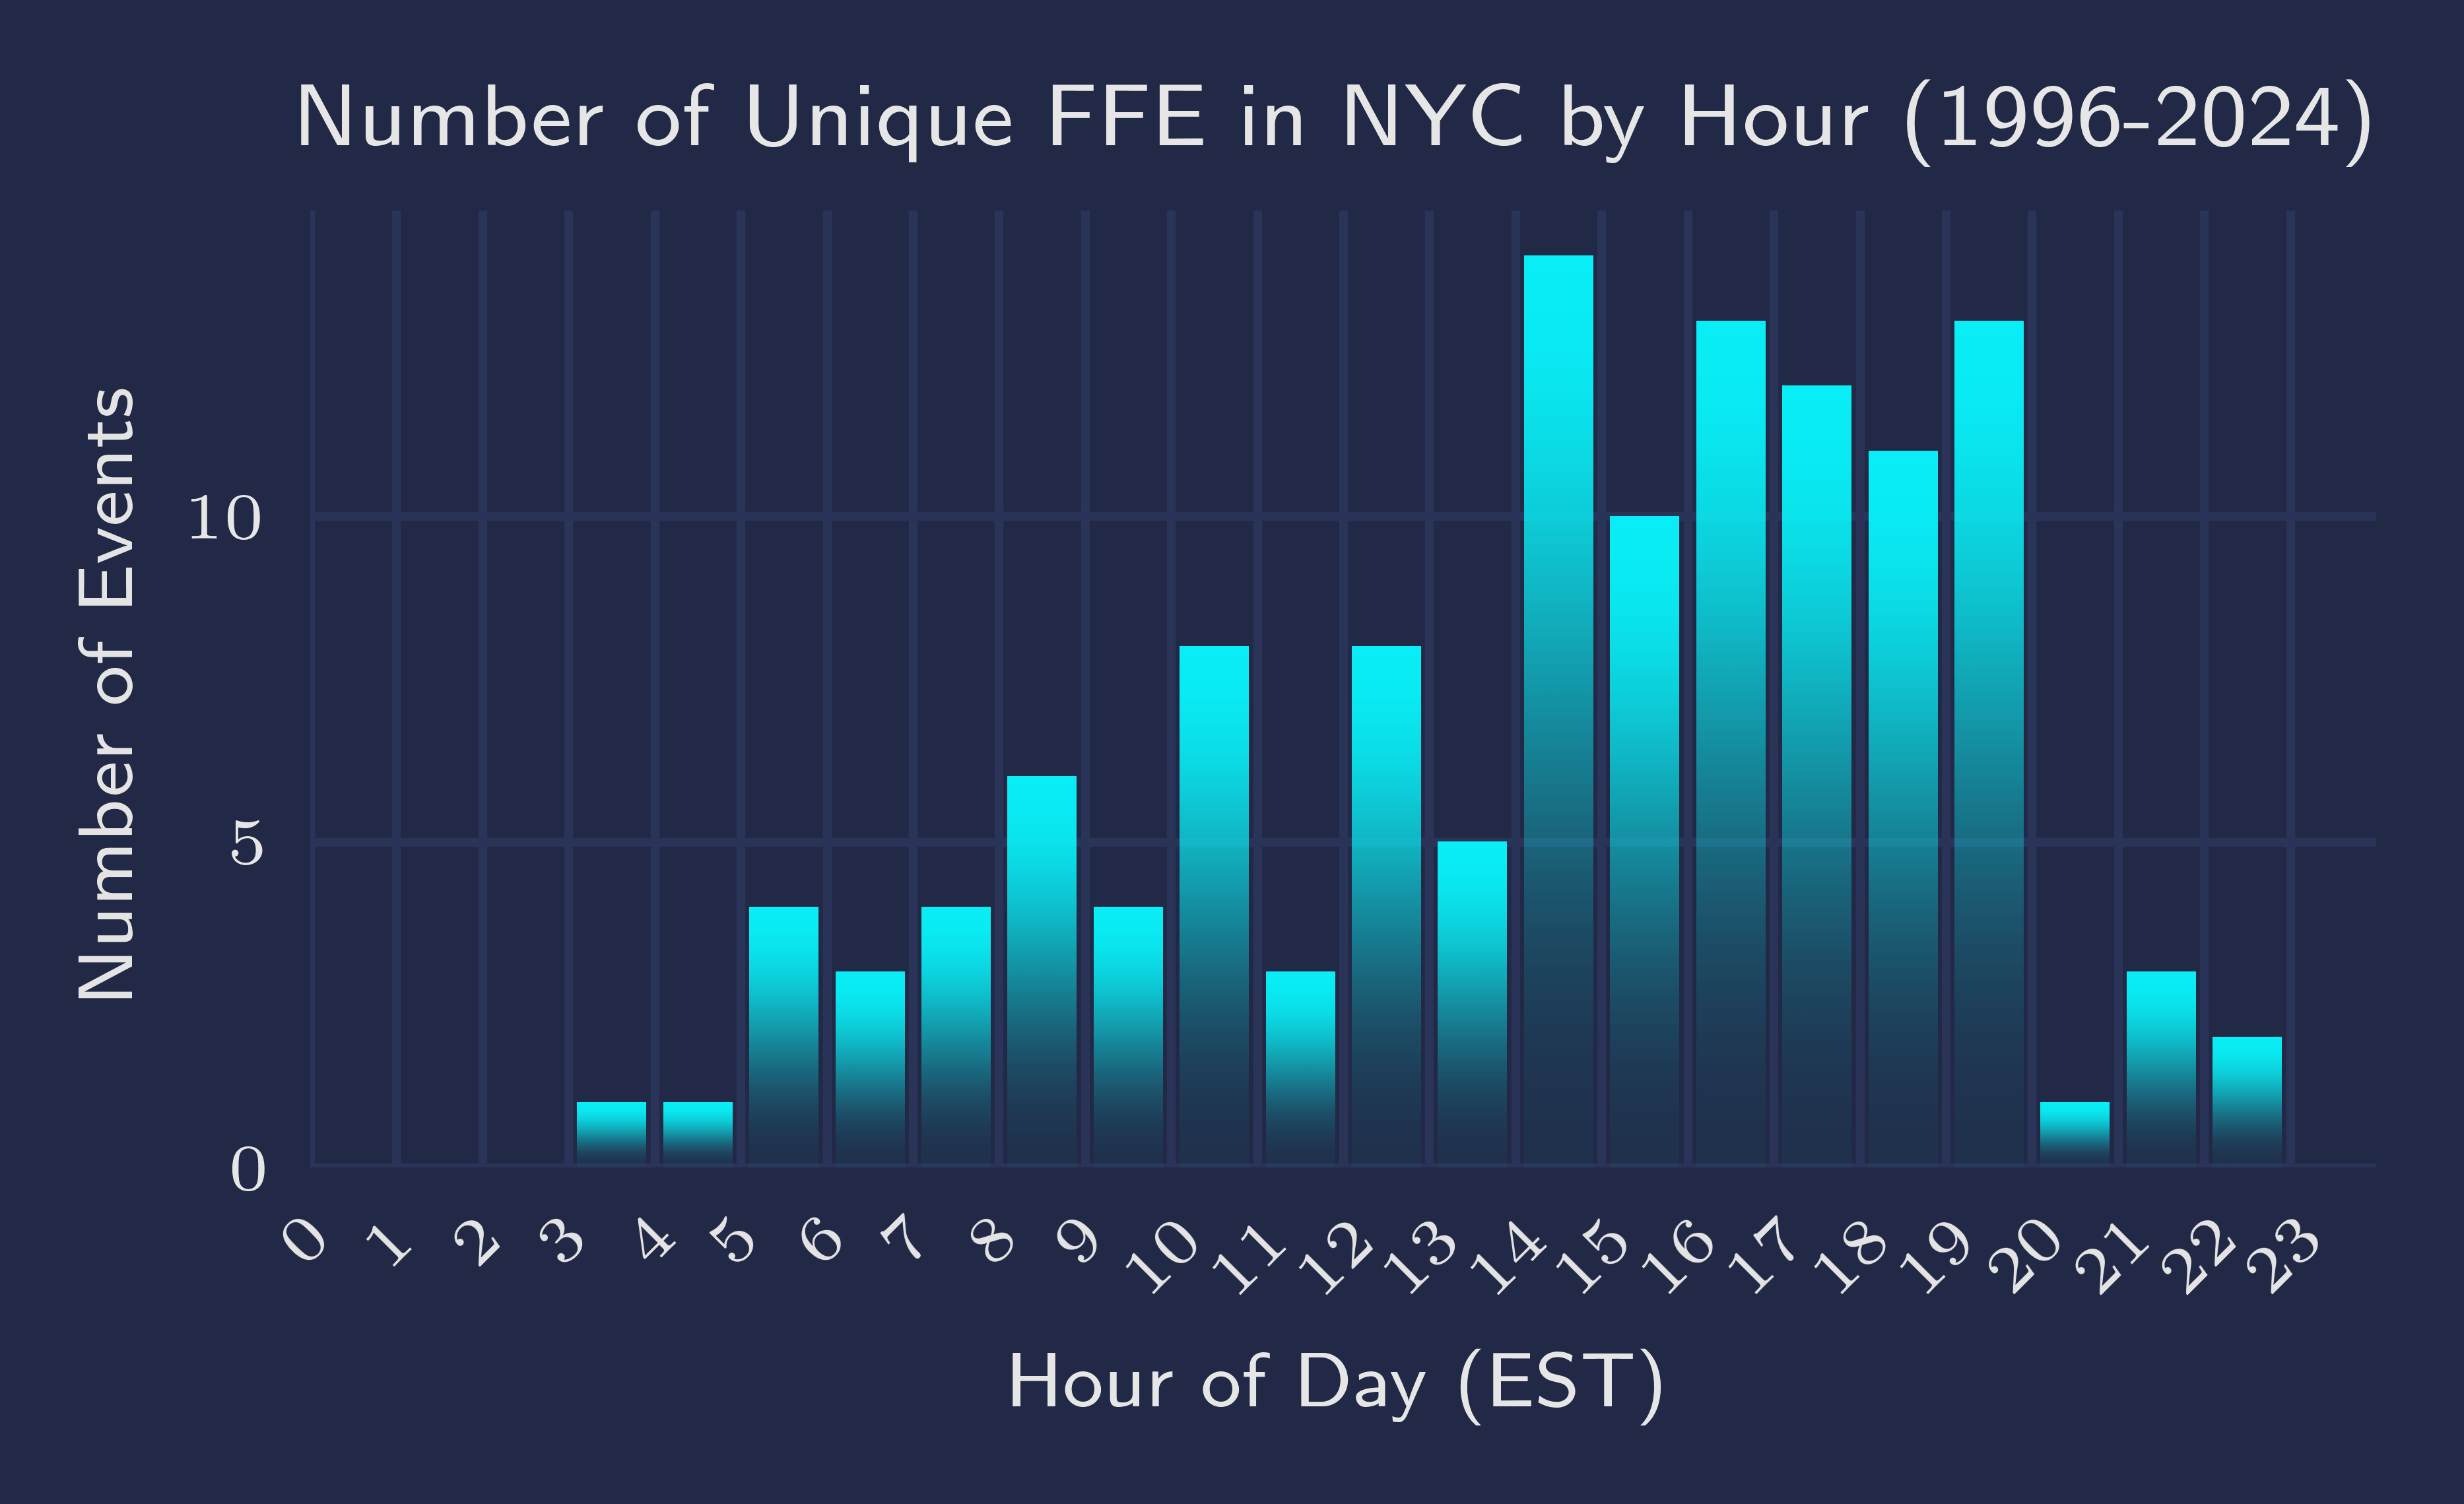

In [12]:
# Make a bar graph of the number of events per hour
plt.figure(figsize=(3.2,2),dpi=600)

# Generate bar graph with ticks on left side
bars = plt.bar(df_hourly["HOUR"]+0.5, df_hourly["EVENT_COUNT"], width=0.8)
mplcyberpunk.add_bar_gradient(bars=bars)

# Set axis labels
plt.xlabel("Hour of Day (EST)", fontsize=7)
plt.ylabel("Number of Events", fontsize=7)

# Set ticks to be on the side of the bars

# Set x-axis limit from 0 to 23
plt.xlim(0, 24)
plt.xticks(range(0, 24), fontsize=6, rotation=45)
plt.yticks(fontsize=6)
# Set title
plt.title("Number of Unique FFE in NYC by Hour (1996-2024)", fontsize=8)

plt.tight_layout()
plt.savefig("figs/ffe-stats/events_per_hour.png", bbox_inches="tight")
plt.show()


## FFEs per month

In [13]:
# Calculate the number of FFEs per month
df_unique["MONTH"] = df_unique["BEGIN_DATETIME"].dt.month
df_monthly = df_unique.groupby("MONTH")["EVENT_COUNT"].sum().reset_index()

### Plotting

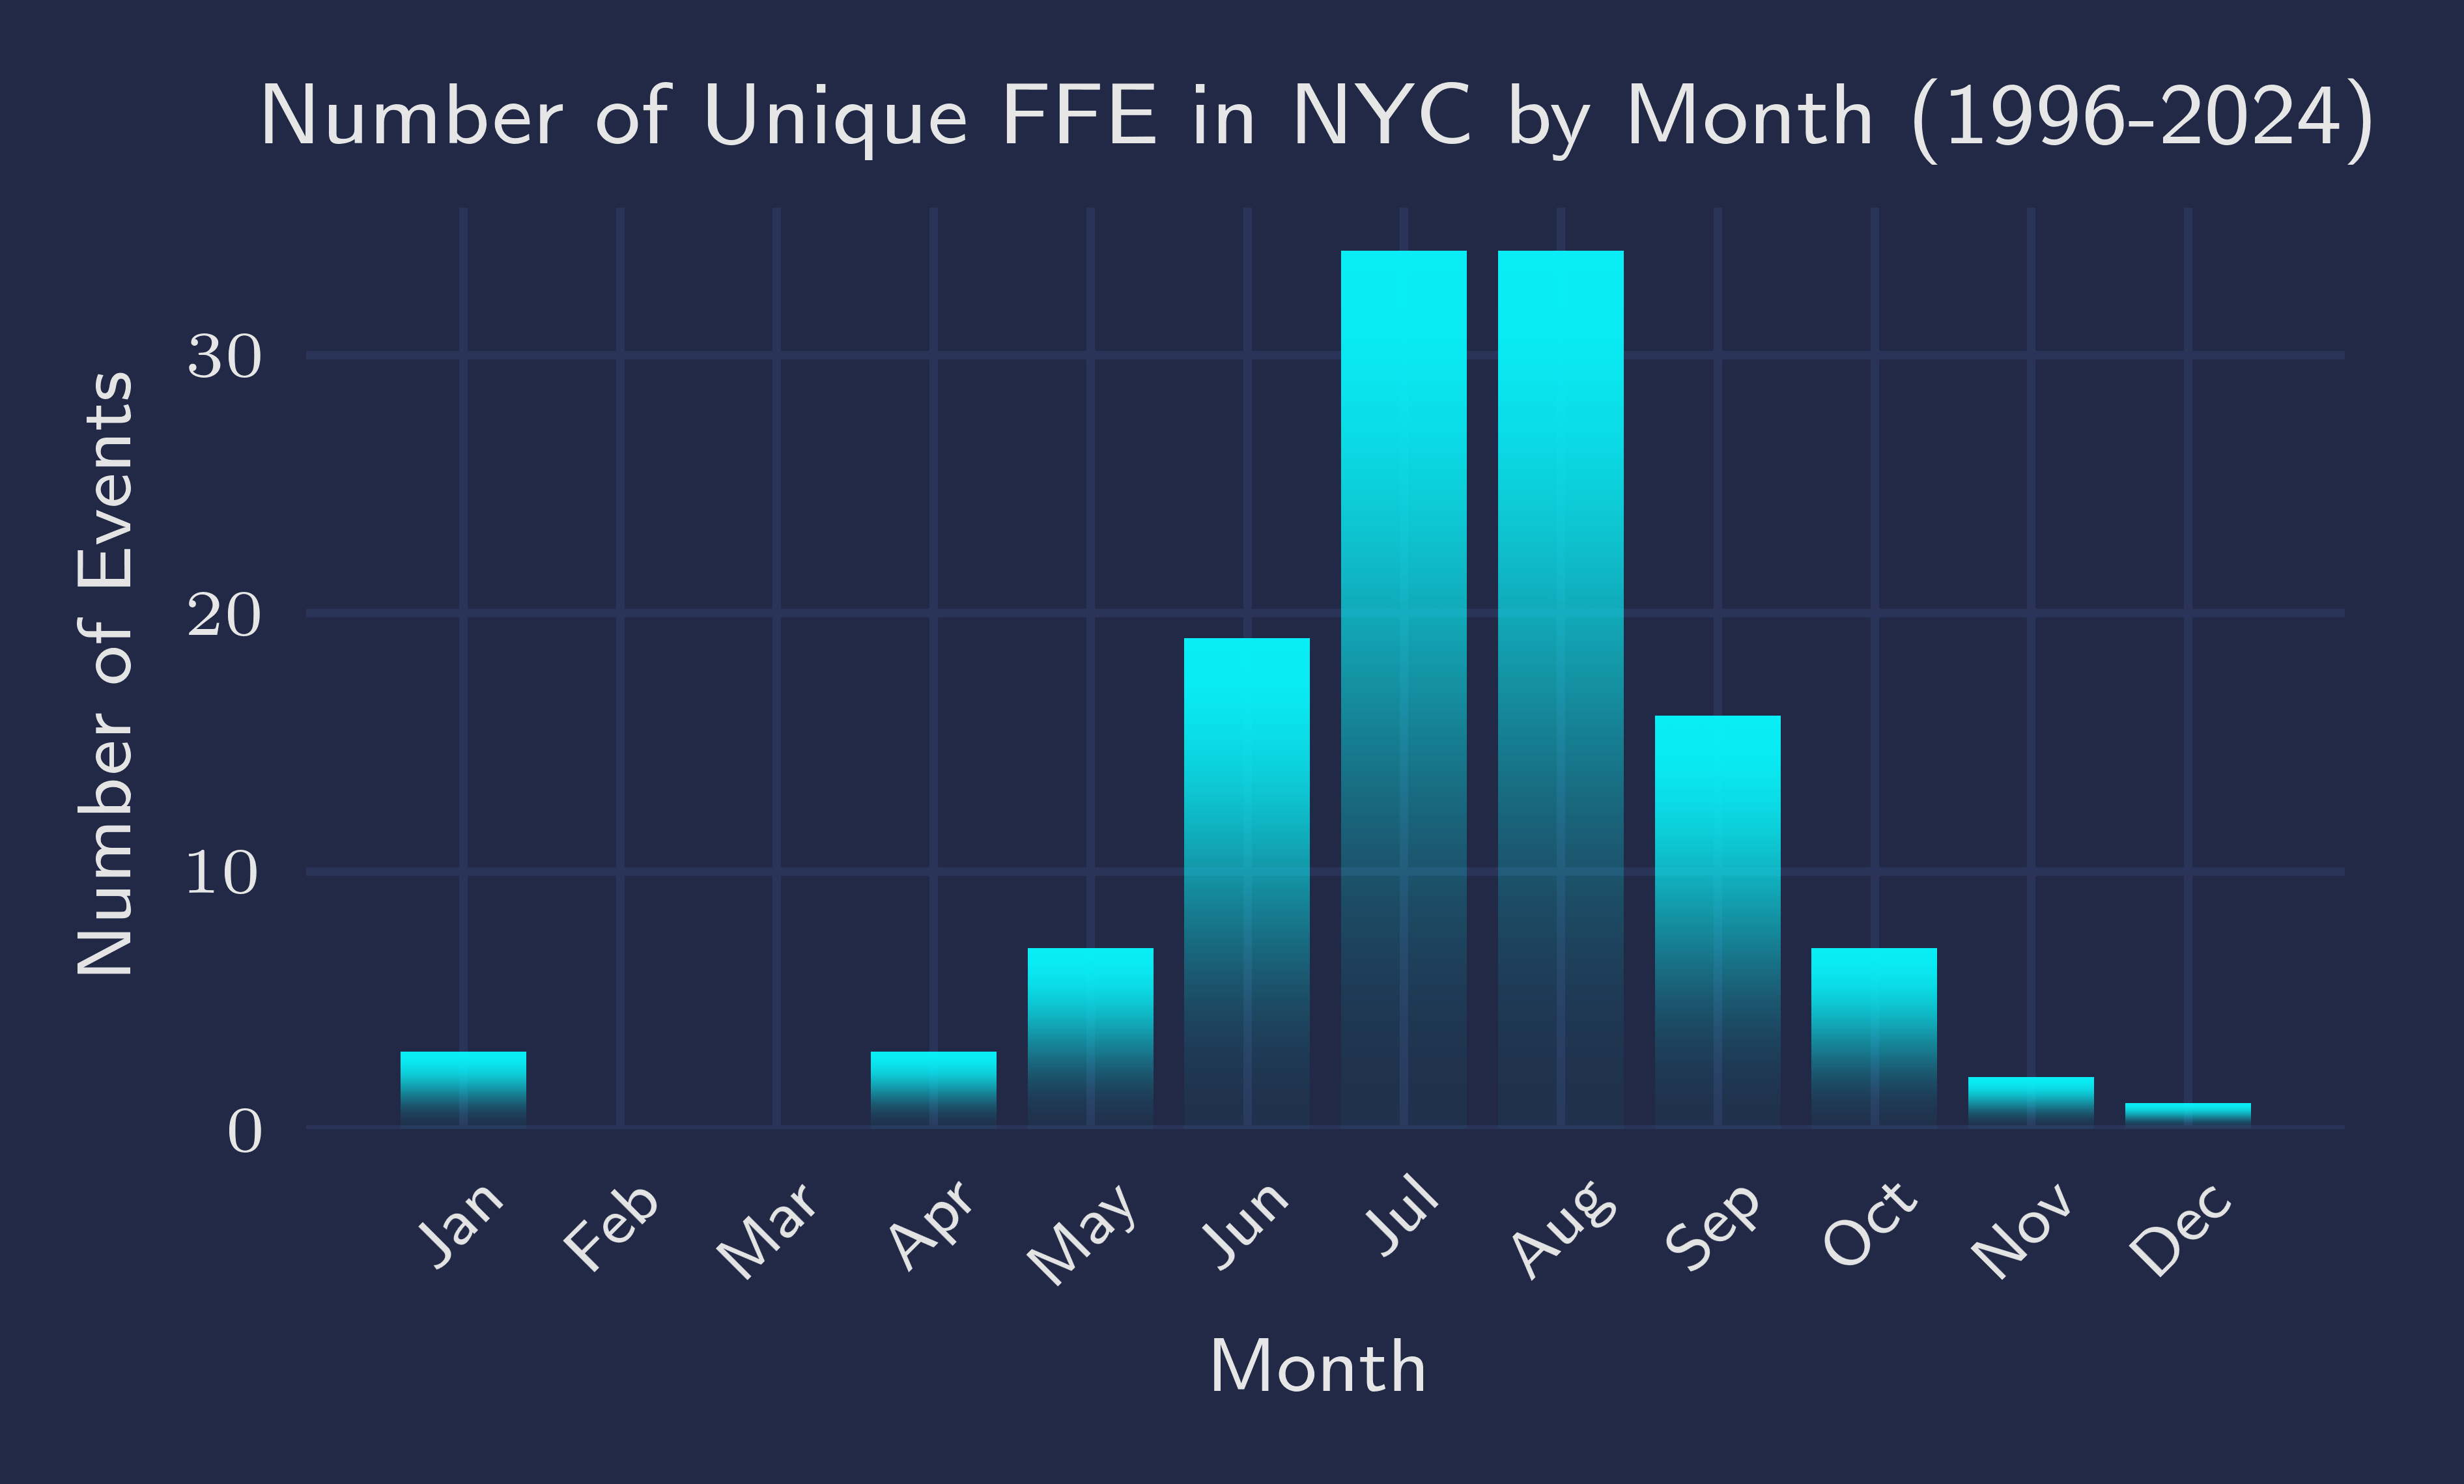

In [14]:
# Make a bar graph of the number of events per hour
plt.figure(figsize=(3.2, 2), dpi=600)

# Generate bar graph with ticks on left side
bars = plt.bar(df_monthly["MONTH"], df_monthly["EVENT_COUNT"], width=0.8)
mplcyberpunk.add_bar_gradient(bars=bars)

# Set axis labels
plt.xlabel("Month", fontsize=7)
plt.ylabel("Number of Events", fontsize=7)

# Set x-axis limit from 0 to 23
plt.xlim(0, 13)
plt.xticks(
    range(1, 13),
    fontsize=6,
    rotation=45,
    labels=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.yticks(fontsize=6)
# Set title
plt.title("Number of Unique FFE in NYC by Month (1996-2024)", fontsize=8)

plt.tight_layout()
plt.savefig("figs/ffe-stats/events_per_month.png", bbox_inches="tight")
plt.show()
